## Varying initial weights

In [156]:
# import module

import numpy as np 
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import functions.WC_model as wc
import functions.steady_state as ss
import functions.pert_protocol as pert
import functions.parameters as params
import functions.name_list as NL
import functions.colour_scheme as colour
import functions.get_average as get_average
import json
import functions.act_func as actFunc

# reload(pert)
reload(params)
reload(ss)
reload(wc)
reload(pert)
reload(NL)

<module 'functions.name_list' from '/Users/yiyang/Desktop/perturbation_fractions_040523/functions/name_list.py'>

In [ ]:
# with open("r_all_record.json", 'w') as fp:
#         json.dump({}, fp)

# with open("W_final_record.json", 'w') as fp:
#         json.dump({}, fp)

# with open("W_init_record.json", 'w') as fp:
#         json.dump({}, fp)

# # with open("x_all_record.json", 'w') as fp:
# #         json.dump({}, fp)

# with open("baseline_r_record.json", 'w') as fp:
#         json.dump({}, fp)


In [ ]:
# w_test = np.arange(0.1,1,0.1)

# # baseline_r_record = []
# # r_all_record = []
# # W_all_record = []
# # x_all_record = []

# for i in [0.9]:
#     J=i

#     # to pyr
#     pyr_pyr = 0.1
#     pyr_pv = J
#     pyr_som = J

#     # to pv
#     pv_pyr = J
#     pv_pv = 0.1
#     pv_som = 0.1

#     # to som
#     som_pyr = J
#     som_pv = 0
#     som_som = 0

#     core_mat = np.array([[pyr_pyr,pyr_pv,pyr_som],
#                         [pv_pyr,pv_pv,pv_som],
#                         [som_pyr,som_pv,som_som]])
#     n_neurones = [100,50,50]
#     W_mean_field = params.mean_field_weight([1,1,1], core_mat)
#     W = params.weight_mat_extended(n_neurones, W_mean_field)

#     N = np.sum(n_neurones)
#     tau = params.tau_generator(n_neurones, 20)
#     tau_x = params.tau_x_generator(n_neurones, 30)

#     neurone_colors = colour.neurone_color_coding(n_neurones)
#     synapse_colors = colour.synapse_color_coding(n_neurones) # get color codes for each synapse
#     names = NL.neurone_names(n_neurones)
# ##################################### threshold ###############################################
#     dt = 0.1
#     T_dur = 30
#     T_betw = 90
#     N_rep = 10
#     pert_fraction = [1,1,1]
#     pert_size = [1,1,1]

#     eta_pre = params.eta_mat_generator(n_neurones, 0)
#     T,S_pre,S = pert.protocol(n_neurones, pert_fraction, T_dur, T_betw, N_rep, pert_size, dt=0.1)
#     r_pre, W_all_pre = wc.solver_simplified(W, eta_pre, tau, tau_x, T, S, dt=0.1)
#     x_basal = r_pre[:,len(r_pre[0])-1]

#     # baseline_r_record.append(x_basal)

# ##################################### simulation ###############################################
#     eta = params.eta_mat_generator(n_neurones, 0.0003)
#     r, W_all, x_all = wc.solver(W, eta, tau, tau_x, x_basal, T, S, dt=0.1)

# ##################################### write-in ###############################################
#     avg_r = get_average.avg_activity(r, n_neurones)
#     after_activity = np.array(avg_r[:,len(avg_r[0])-1]).tolist()

#     final_weight = W_all[len(W_all)-1].tolist()
#     init_weight = W_all[0].tolist()

#     with open("r_all_record.json", 'r') as fp:
#         dictObj = json.load(fp)
#     dictObj.update({i:after_activity})
#     with open("r_all_record.json", 'w') as fp:
#             json.dump(dictObj, fp)
    
#     with open("W_final_record.json", 'r') as fp:
#         dictObj = json.load(fp)
#     dictObj.update({i:final_weight})
#     with open("W_final_record.json", 'w') as fp:
#             json.dump(dictObj, fp)

#     with open("W_init_record.json", 'r') as fp:
#         dictObj = json.load(fp)
#     dictObj.update({i:init_weight})
#     with open("W_init_record.json", 'w') as fp:
#             json.dump(dictObj, fp)
    
#     # with open("x_all_record.json", 'r') as fp:
#     #     dictObj = json.load(fp)
#     # dictObj.update({i:x_all})
#     # with open("x_all_record.json", 'w') as fp:
#     #         json.dump(dictObj, fp)
    
#     with open("baseline_r_record.json", 'r') as fp:
#         dictObj = json.load(fp)
#     dictObj.update({i:x_basal.tolist()})
#     with open("baseline_r_record.json", 'w') as fp:
#             json.dump(dictObj, fp)
    
#     print(i)

### Changes in activity

In [55]:
# Exc activity

with open("r_all_record.json", 'r') as fp:
    exc_dict = json.load(fp)
PCs_act = [exc_dict[i][0] for i in exc_dict.keys()]
PV_act = [exc_dict[i][1] for i in exc_dict.keys()]
SOM_act = [exc_dict[i][2] for i in exc_dict.keys()]

with open("baseline_r_record.json", 'r') as fp:
    baseline_r_record = json.load(fp)
baseline_r_record = [baseline_r_record[i] for i in exc_dict.keys()]
baseline_act = []
for i in range(9):
    baseline_act.append(np.array([np.average(baseline_r_record[i][:100]),
              np.average(baseline_r_record[i][101:151]),
              np.average(baseline_r_record[i][151:])]))
PCs_baseline = [baseline_act[i][0] for i in range(9)]
PV_baseline = [baseline_act[i][1] for i in range(9)]
SOM_baseline = [baseline_act[i][2] for i in range(9)]

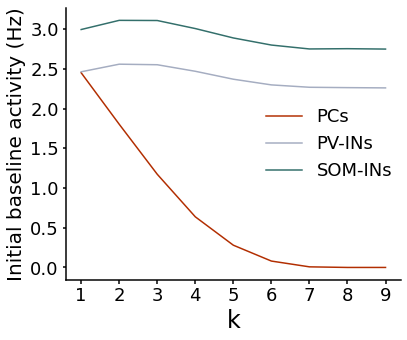

In [194]:
population_colors = ['#b22e01', '#a5adc1', '#336f6b']

fig, ax = plt.subplots(figsize=(7.5,5))

ax.plot(np.arange(0.1,1,0.1)*10, [PCs_baseline[i] for i in range(9)], c="#b22e01")
ax.plot(np.arange(0.1,1,0.1)*10, [PV_baseline[i] for i in range(9)], c="#a5adc1")
ax.plot(np.arange(0.1,1,0.1)*10, [SOM_baseline[i] for i in range(9)], c="#336f6b")

ax.set_xlabel('k', fontdict={'size':24, 'color':'black'})
ax.set_ylabel('Initial baseline activity (Hz)', fontdict={'size':20, 'color':'black'})
ax.grid(False)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(['PCs', 'PV-INs', 'SOM-INs'], loc='center left', bbox_to_anchor=(0.55, 0.5), 
          prop = {"size": 18}, frameon=False, labelcolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(color='black', labelcolor='black',width=1.5)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


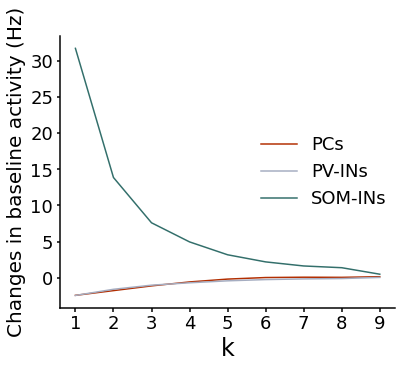

In [218]:
population_colors = ['#b22e01', '#a5adc1', '#336f6b']

fig, ax = plt.subplots(figsize=(7.5,5))

ax.plot(np.arange(0.1,1,0.1)*10, [PCs_act[i]-PCs_baseline[i] for i in range(9)], c="#b22e01")
ax.plot(np.arange(0.1,1,0.1)*10, [PV_act[i]-PV_baseline[i] for i in range(9)], c="#a5adc1")
ax.plot(np.arange(0.1,1,0.1)*10, [SOM_act[i]-SOM_baseline[i] for i in range(9)], c="#336f6b")
# plt.axhline(y = 0, color = 'black', linestyle = '--')

ax.set_xlabel('k', fontdict={'size':24, 'color':'black'})
ax.set_ylabel('Changes in baseline activity (Hz)', fontdict={'size':20, 'color':'black'})
ax.grid(False)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(['PCs', 'PV-INs', 'SOM-INs'], loc='center left', bbox_to_anchor=(0.55, 0.5), 
          prop = {"size": 18}, frameon=False, labelcolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(color='black', labelcolor='black',width=1.5)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [87]:
with open("W_init_record.json", 'r') as fp:
    w_init_dict = json.load(fp)
w_init = [w_init_dict[i] for i in w_init_dict.keys()]

In [85]:
# # Create initial weight matrix

# W_init_collection = []
# for i in np.arange(0.1, 1, 0.05):
#     J=0.1   # synapses of interest
#     # to pyr
#     pyr_pyr = 0.1
#     pyr_pv = J
#     pyr_som = J
#     # to pv
#     pv_pyr = J
#     pv_pv = 0.1
#     pv_som = 0.1
#     # to som
#     som_pyr = J
#     som_pv = 0
#     som_som = 0

#     core_mat = np.array([[pyr_pyr,pyr_pv,pyr_som],
#                         [pv_pyr,pv_pv,pv_som],
#                         [som_pyr,som_pv,som_som]
#                         ])
#     n_neurones = [100,50,50]
#     W_mean_field = params.mean_field_weight([1,1,1], core_mat)
#     W = params.weight_mat_extended(n_neurones, W_mean_field)

#     W_init_collection.append(W)

/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/263962718.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  diff = np.reciprocal(np.identity(200)-w_init[j])
/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/263962718.py:7: RuntimeWarning: invalid value encountered in multiply
  theoretical = diff*delta_s


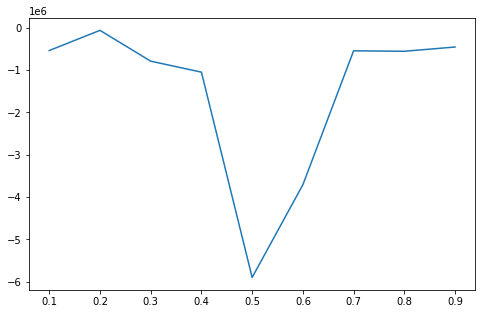

In [118]:
theoretical_exc_act = []

for j in range(len(w_init)):
    delta_s = np.zeros((200,1))
    delta_s[:100,:]=delta_s[:100,:]+1
    diff = np.reciprocal(np.identity(200)-w_init[j])
    theoretical = diff*delta_s
    rowSum=[]
    for i in range(100):
        rowSum.append(np.sum(theoretical[i]))

    theoretical_exc_act.append(np.average(rowSum))

fig, ax = plt.subplots(figsize=(8,5))
# ax.plot(np.arange(0.1, 1, 0.05), theoretical_exc_act)
ax.plot(w_init_dict.keys(), theoretical_exc_act)

In [114]:
# Create initial weight matrix

W_init_mean_collection = []
for i in np.arange(0.1, 1, 0.1):
    J=i   # synapses of interest
    # to pyr
    pyr_pyr = 0.1
    pyr_pv = J
    pyr_som = J
    # to pv
    pv_pyr = J
    pv_pv = 0.1
    pv_som = 0.1
    # to som
    som_pyr = J
    som_pv = 0
    som_som = 0

    core_mat = np.array([[pyr_pyr,pyr_pv,pyr_som],
                        [pv_pyr,pv_pv,pv_som],
                        [som_pyr,som_pv,som_som]
                        ])
    W_mean_field = params.mean_field_weight([1,1,1], core_mat)
    W = params.weight_mat_extended([1,1,1], W_mean_field)

    W_init_mean_collection.append(W)


mean_field_exc_act = []

for j in range(len(W_init_mean_collection)):
    delta_s = np.zeros((3,1))
    delta_s[0]=delta_s[0]+1
    diff = np.reciprocal(np.identity(3)-W_init_mean_collection[j])
    theoretical = diff*delta_s
    mean_field_exc_act.append(np.sum(theoretical[0]))

/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/352897719.py:34: RuntimeWarning: divide by zero encountered in reciprocal
  diff = np.reciprocal(np.identity(3)-W_init_mean_collection[j])
/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/352897719.py:34: RuntimeWarning: invalid value encountered in reciprocal
  diff = np.reciprocal(np.identity(3)-W_init_mean_collection[j])
/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/352897719.py:35: RuntimeWarning: invalid value encountered in multiply
  theoretical = diff*delta_s


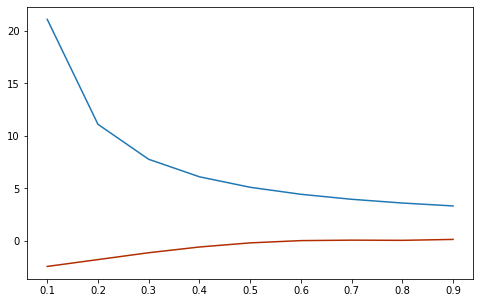

In [117]:
# mean-field vs simulation results

fig, ax = plt.subplots(figsize=(8,5))
# ax.plot(np.arange(0.1, 1, 0.05), theoretical_exc_act)
ax.plot(exc_dict.keys(), [PCs_act[i]-PCs_baseline[i] for i in range(9)], c="#b22e01")
# ax.plot(w_init_dict.keys(), theoretical_exc_act)
ax.plot(w_init_dict.keys(), mean_field_exc_act)

### Changes in weights (simulation)

In [139]:
with open("W_init_record.json", 'r') as fp:
    w_init_dict = json.load(fp)

with open("W_final_record.json", 'r') as fp:
    w_final_dict = json.load(fp)

w_init = [np.array(w_init_dict[i]) for i in w_init_dict.keys()]
w_final = [np.array(w_final_dict[i]) for i in w_final_dict.keys()]

In [141]:
diff_mat = []
for i in range(len(w_final)):
    diff = np.subtract(get_average.avg_weight(w_final[i], [100,50,50]), get_average.avg_weight(w_init[i], [100,50,50]))
    diff_mat.append(diff)

In [145]:
changes_w_PE = [diff_mat[i][1,0] for i in range(len(diff_mat))]
changes_w_SE = [diff_mat[i][2,0] for i in range(len(diff_mat))]
changes_w_EP = [diff_mat[i][0,1] for i in range(len(diff_mat))]

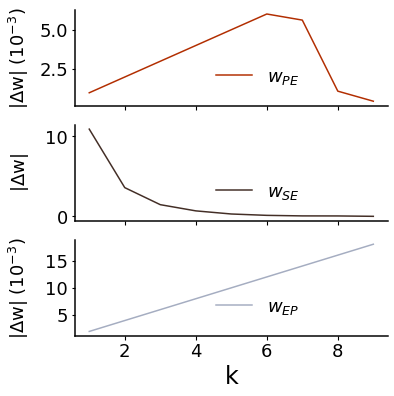

In [210]:

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(7, 6))

avg_synapse_names = ['$w_{PE}$', '$w_{SE}$', '$w_{EP}$']
ax[0].plot(np.arange(0.1,1,0.1)*10, [np.abs(changes_w_PE[i]*1000) for i in range(len(changes_w_PE))], c='#b22e01')
ax[1].plot(np.arange(0.1,1,0.1)*10, [np.abs(changes_w_SE[i]) for i in range(len(changes_w_SE))], c='#432e26')
ax[2].plot(np.arange(0.1,1,0.1)*10, [np.abs(changes_w_EP[i]*1000) for i in range(len(changes_w_EP))], c='#a5adc1')

x_ticks=[0,500,1000,1500]
x_labels=[0,500,1000,1500]

for i in [0,1,2]:
    # ax[i].yaxis.set_label_coords(-0.15,0.6)
    ax[i].grid(False)
    # Shrink current axis by 20%
    box = ax[i].get_position()
    ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend at the bottom of the current axis
    ax[i].legend([avg_synapse_names[i]], loc='center left', 
                 bbox_to_anchor=(0.4, 0.3), prop = {"size": 18}, ncol=1, frameon=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    # ax[0].spines['bottom'].set_visible(False)
    ax[i].spines['bottom'].set_color('black')
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['left'].set_color('black')
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].tick_params(color='black', labelcolor='black', width=1.1, labelsize=18)
    ax[i].yaxis.set_label_coords(-0.14,0.5)

ax[2].set_xlabel('k', fontdict={'size':24, 'color':'black'})
# plt.xticks(ticks=x_ticks, labels=x_labels)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

ax[0].set_ylabel("|$\Delta$w| ($10^{-3}$)", fontdict={'size':18, 'color':'black'})
ax[1].set_ylabel("|$\Delta$w|", fontdict={'size':18, 'color':'black'})
ax[2].set_ylabel("|$\Delta$w| ($10^{-3}$)", fontdict={'size':18, 'color':'black'})

plt.show()

### Theoretical results aligned with simulation

In [349]:
# Theoretical results
# P = ηAδsδs^TA^T

eta_mat = params.eta_mat_generator([100,50,50], 0.0003)
delta_s = np.ones((200,1))
delta_s = np.zeros((200,1))
delta_s[:,:]=delta_s[:,:]+0.01
# delta_s[:100,:]=delta_s[:100,:]+1

average_theoretical=[]

for i in range(len(w_init)):

    A_mat = np.reciprocal(np.identity(200)-w_init[i])
    theoretical_change_W = eta_mat*A_mat*delta_s*np.transpose(delta_s)[0]*np.transpose(A_mat)[0]
    avg = get_average.avg_weight(theoretical_change_W, [100,50,50])
    # avg = get_average.MF_weight(theoretical_change_W, [100,50,50])

    average_theoretical.append(avg)


/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/1861837771.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  A_mat = np.reciprocal(np.identity(200)-w_init[i])
/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/1861837771.py:15: RuntimeWarning: invalid value encountered in multiply
  theoretical_change_W = eta_mat*A_mat*delta_s*np.transpose(delta_s)[0]*np.transpose(A_mat)[0]


In [350]:
theo_changes_w_PE = [average_theoretical[i][1,0] for i in range(len(average_theoretical))]
theo_changes_w_SE = [average_theoretical[i][2,0] for i in range(len(average_theoretical))]
theo_changes_w_EP = [average_theoretical[i][0,1] for i in range(len(average_theoretical))]

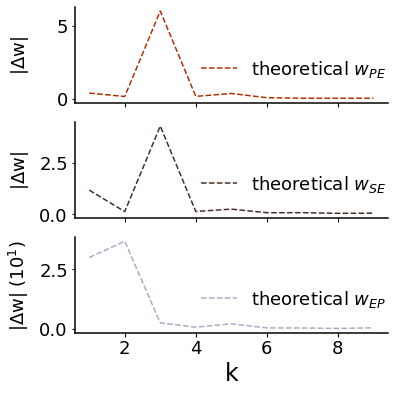

In [351]:

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(7, 6))

avg_synapse_names = ['theoretical $w_{PE}$', 'theoretical $w_{SE}$', 'theoretical $w_{EP}$']
ax[0].plot(np.arange(0.1,1,0.1)*10, [np.abs(theo_changes_w_PE[i])*1 for i in range(len(theo_changes_w_PE))], c='#b22e01', linestyle='dashed')
ax[1].plot(np.arange(0.1,1,0.1)*10, [np.abs(theo_changes_w_SE[i])*1 for i in range(len(theo_changes_w_SE))], c='#432e26', linestyle='dashed')
ax[2].plot(np.arange(0.1,1,0.1)*10, [np.abs(theo_changes_w_EP[i])*10 for i in range(len(theo_changes_w_EP))], c='#a5adc1', linestyle='dashed')

x_ticks=[0,500,1000,1500]
x_labels=[0,500,1000,1500]

for i in [0,1,2]:
    # ax[i].yaxis.set_label_coords(-0.15,0.6)
    ax[i].grid(False)
    # Shrink current axis by 20%
    box = ax[i].get_position()
    ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend at the bottom of the current axis
    ax[i].legend([avg_synapse_names[i]], loc='center left', 
                 bbox_to_anchor=(0.35, 0.35), prop = {"size": 18}, ncol=1, frameon=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    # ax[0].spines['bottom'].set_visible(False)
    ax[i].spines['bottom'].set_color('black')
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['left'].set_color('black')
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].tick_params(color='black', labelcolor='black', width=1.1, labelsize=18)
    ax[i].yaxis.set_label_coords(-0.14,0.5)

ax[2].set_xlabel('k', fontdict={'size':24, 'color':'black'})
# plt.xticks(ticks=x_ticks, labels=x_labels)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

ax[0].set_ylabel("|$\Delta$w|", fontdict={'size':18, 'color':'black'})
ax[1].set_ylabel("|$\Delta$w|", fontdict={'size':18, 'color':'black'})
ax[2].set_ylabel("|$\Delta$w| ($10^{1}$)", fontdict={'size':18, 'color':'black'})

plt.show()

### Mean-field results aligned with simulation

In [326]:
# MF results
# P = ηAδsδs^TA^T

eta_mat = params.eta_mat_generator([1,1,1], 0.0003)
delta_s = np.ones((3,1))
# delta_s = np.zeros((3,1))
# delta_s[1,:]=delta_s[1,:]+1

MF_weight_change=[]

for i in range(len(w_init)):
    MF_W = get_average.MF_weight(w_init[i], [100,50,50])
    A_mat = np.reciprocal(np.identity(3)-MF_W)
    # A_mat = np.reciprocal(np.identity(3)-W_MF_collection[i])

    MF_change_W = eta_mat*A_mat*delta_s*np.transpose(delta_s)[0]*np.transpose(A_mat)[0]
    
    MF_weight_change.append(MF_change_W)


/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/670526568.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  A_mat = np.reciprocal(np.identity(3)-MF_W)
/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/670526568.py:13: RuntimeWarning: invalid value encountered in reciprocal
  A_mat = np.reciprocal(np.identity(3)-MF_W)
/var/folders/j6/hx62bgnj68lg9xw0tp4w9kp00000gn/T/ipykernel_68653/670526568.py:16: RuntimeWarning: invalid value encountered in multiply
  MF_change_W = eta_mat*A_mat*delta_s*np.transpose(delta_s)[0]*np.transpose(A_mat)[0]


In [327]:
MF_changes_w_PE = [MF_weight_change[i][1,0] for i in range(len(MF_weight_change))]
MF_changes_w_SE = [MF_weight_change[i][2,0] for i in range(len(MF_weight_change))]
MF_changes_w_EP = [MF_weight_change[i][0,1] for i in range(len(MF_weight_change))]

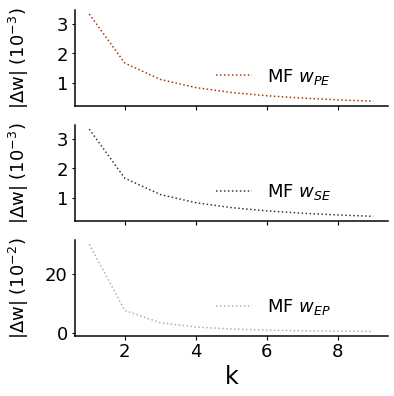

In [344]:

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(7, 6))

avg_synapse_names = ['MF $w_{PE}$', 'MF $w_{SE}$', 'MF $w_{EP}$']
ax[0].plot(np.arange(0.1,1,0.1)*10, [np.abs(MF_changes_w_PE[i])*1000 for i in range(len(MF_changes_w_PE))], c='#b22e01', linestyle='dotted')
ax[1].plot(np.arange(0.1,1,0.1)*10, [np.abs(MF_changes_w_SE[i])*1000 for i in range(len(MF_changes_w_SE))], c='#432e26', linestyle='dotted')
ax[2].plot(np.arange(0.1,1,0.1)*10, [np.abs(MF_changes_w_EP[i])*1000 for i in range(len(MF_changes_w_EP))], c='#a5adc1', linestyle='dotted')

x_ticks=[0,500,1000,1500]
x_labels=[0,500,1000,1500]

for i in [0,1,2]:
    # ax[i].yaxis.set_label_coords(-0.15,0.6)
    ax[i].grid(False)
    # Shrink current axis by 20%
    box = ax[i].get_position()
    ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend at the bottom of the current axis
    ax[i].legend([avg_synapse_names[i]], loc='center left', 
                 bbox_to_anchor=(0.4, 0.3), prop = {"size": 18}, ncol=1, frameon=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    # ax[0].spines['bottom'].set_visible(False)
    ax[i].spines['bottom'].set_color('black')
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['left'].set_color('black')
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].tick_params(color='black', labelcolor='black', width=1.1, labelsize=18)
    ax[i].yaxis.set_label_coords(-0.14,0.5)

ax[2].set_xlabel('k', fontdict={'size':24, 'color':'black'})
# plt.xticks(ticks=x_ticks, labels=x_labels)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

ax[0].set_ylabel("|$\Delta$w| ($10^{-3}$)", fontdict={'size':18, 'color':'black'})
ax[1].set_ylabel("|$\Delta$w| ($10^{-3}$)", fontdict={'size':18, 'color':'black'})
ax[2].set_ylabel("|$\Delta$w| ($10^{-2}$)", fontdict={'size':18, 'color':'black'})

plt.show()